In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df=pd.read_excel("Office Infrastructure.xlsx",)

In [4]:
df.head()

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,Product Sub-Category,Product Container,Product Name,Product Base Margin,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,Labels,Small Box,Avery 49,0.36,Central,Illinois,Addison,60101,2012-05-28,2012-05-30,1.3200,2,5.90,88525
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,Pens & Art Supplies,Wrap Bag,SANFORD Liquid Accent™ Tank-Style Highlighters,0.54,West,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.5600,4,13.01,88522
2,23086,Not Specified,0.03,6.68,6.15,3,Bonnie Potter,Express Air,Corporate,Office Supplies,Paper,Small Box,Xerox 1968,0.37,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-47.6400,7,49.92,88523
3,23087,Not Specified,0.01,5.68,3.60,3,Bonnie Potter,Regular Air,Corporate,Office Supplies,"Scissors, Rulers and Trimmers",Small Pack,Acme® Preferred Stainless Steel Scissors,0.56,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-30.5100,7,41.64,88523
4,23088,Not Specified,0.00,205.99,2.50,3,Bonnie Potter,Express Air,Corporate,Technology,Telephones and Communication,Small Box,V70,0.59,West,Washington,Anacortes,98221,2011-07-27,2011-07-27,998.2023,8,1446.67,88523


# Perform following action to our data

#### 1. Some basic questions
#### 2. Data cleaning (remove unnesccessary col)
#### 3. EDA
#### 4. Streamlit graphs using vs code

# Report
1. In first section (some basic question) the data have 94256 rows and 24 columns and Product Base Margin column have 72 null value.
2. Remaing columns have no any null value.
3. The given data have no duplicated value.
4. Some columns which are unneccessary we need to remove. like [Row ID,Customer Name,Product Name,Postal Code,Order Date,Ship Date,Order ID] Now the date column is must we can check it how much order occure in which date or in which month we can do analysis on that in latter.
<h2> Cleaning part </h2>
1. we remove all the columns whcih we mention above. 
2. We fill the col Product Base Margin using mean value.

# 1. Some basic Questions

In [5]:
df.shape

(9426, 24)

In [6]:
df.isnull().sum()

Row ID                   0
Order Priority           0
Discount                 0
Unit Price               0
Shipping Cost            0
Customer ID              0
Customer Name            0
Ship Mode                0
Customer Segment         0
Product Category         0
Product Sub-Category     0
Product Container        0
Product Name             0
Product Base Margin     72
Region                   0
State or Province        0
City                     0
Postal Code              0
Order Date               0
Ship Date                0
Profit                   0
Quantity ordered new     0
Sales                    0
Order ID                 0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9426 entries, 0 to 9425
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                9426 non-null   int64         
 1   Order Priority        9426 non-null   object        
 2   Discount              9426 non-null   float64       
 3   Unit Price            9426 non-null   float64       
 4   Shipping Cost         9426 non-null   float64       
 5   Customer ID           9426 non-null   int64         
 6   Customer Name         9426 non-null   object        
 7   Ship Mode             9426 non-null   object        
 8   Customer Segment      9426 non-null   object        
 9   Product Category      9426 non-null   object        
 10  Product Sub-Category  9426 non-null   object        
 11  Product Container     9426 non-null   object        
 12  Product Name          9426 non-null   object        
 13  Product Base Margi

In [9]:
df.describe()

,Row ID,Discount,Unit Price,Shipping Cost,Customer ID,Product Base Margin,Postal Code,Profit,Quantity ordered new,Sales,Order ID
count,9426.000000,9426.000000,9426.000000,9426.000000,9426.000000,9354.000000,9426.000000,9426.000000,9426.000000,9426.000000,9426.000000
mean,20241.015277,0.049628,88.303686,12.795142,1738.422236,0.512189,52446.327286,139.236410,13.798430,949.706272,82318.489073
std,6101.890965,0.031798,281.540982,17.181203,979.167197,0.135229,29374.597802,998.486483,15.107688,2598.019818,19149.448857
min,2.000000,0.000000,0.990000,0.490000,2.000000,0.350000,1001.000000,-16476.838000,1.000000,1.320000,6.000000
25%,19330.250000,0.020000,6.480000,3.192500,898.000000,0.380000,29406.000000,-74.017375,5.000000,61.282500,86737.250000
50%,21686.500000,0.050000,20.990000,6.050000,1750.000000,0.520000,52302.000000,2.567600,10.000000,203.455000,88344.500000
75%,24042.750000,0.080000,85.990000,13.990000,2578.750000,0.590000,78516.000000,140.243850,17.000000,776.402500,89987.750000
max,26399.000000,0.250000,6783.020000,164.730000,3403.000000,0.850000,99362.000000,16332.414000,170.000000,100119.160000,91591.000000


# 2. Data cleaning (remove unnesccessary col)

In [10]:
df.drop(columns=['Row ID','Customer Name','Product Name','Postal Code','Order Date','Ship Date','Order ID'],inplace=True)

In [11]:
df.head()

,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Ship Mode,Customer Segment,Product Category,Product Sub-Category,Product Container,Product Base Margin,Region,State or Province,City,Profit,Quantity ordered new,Sales
0,Not Specified,0.01,2.88,0.50,2,Regular Air,Corporate,Office Supplies,Labels,Small Box,0.36,Central,Illinois,Addison,1.3200,2,5.90
1,High,0.01,2.84,0.93,3,Express Air,Corporate,Office Supplies,Pens & Art Supplies,Wrap Bag,0.54,West,Washington,Anacortes,4.5600,4,13.01
2,Not Specified,0.03,6.68,6.15,3,Express Air,Corporate,Office Supplies,Paper,Small Box,0.37,West,Washington,Anacortes,-47.6400,7,49.92
3,Not Specified,0.01,5.68,3.60,3,Regular Air,Corporate,Office Supplies,"Scissors, Rulers and Trimmers",Small Pack,0.56,West,Washington,Anacortes,-30.5100,7,41.64
4,Not Specified,0.00,205.99,2.50,3,Express Air,Corporate,Technology,Telephones and Communication,Small Box,0.59,West,Washington,Anacortes,998.2023,8,1446.67


In [12]:
df['Product Base Margin']=df['Product Base Margin'].fillna(np.mean)

In [13]:
df.isnull().sum()

Order Priority          0
Discount                0
Unit Price              0
Shipping Cost           0
Customer ID             0
Ship Mode               0
Customer Segment        0
Product Category        0
Product Sub-Category    0
Product Container       0
Product Base Margin     0
Region                  0
State or Province       0
City                    0
Profit                  0
Quantity ordered new    0
Sales                   0
dtype: int64

# 3. EDA

In [14]:
df['Order Priority'].value_counts()

High             1970
Low              1926
Not Specified    1881
Medium           1844
Critical         1804
Critical            1
Name: Order Priority, dtype: int64

In [15]:
df['Customer ID'].value_counts()

1193    27
699     26
2107    22
2491    22
2882    21
        ..
2536     1
2538     1
1172     1
1168     1
2        1
Name: Customer ID, Length: 2703, dtype: int64

In [16]:
df['Ship Mode'].value_counts()

Regular Air       7036
Delivery Truck    1283
Express Air       1107
Name: Ship Mode, dtype: int64

In [17]:
df['Customer Segment'].value_counts()

Corporate         3375
Home Office       2316
Consumer          1894
Small Business    1841
Name: Customer Segment, dtype: int64

In [18]:
df['Product Category'].value_counts()

Office Supplies    5181
Technology         2312
Furniture          1933
Name: Product Category, dtype: int64

In [19]:
df['Product Sub-Category'].value_counts()

Paper                             1379
Binders and Binder Accessories    1028
Telephones and Communication       992
Office Furnishings                 883
Computer Peripherals               846
Pens & Art Supplies                721
Storage & Organization             610
Appliances                         492
Chairs & Chairmats                 440
Tables                             404
Office Machines                    376
Labels                             329
Envelopes                          272
Bookcases                          206
Rubber Bands                       195
Scissors, Rulers and Trimmers      155
Copiers and Fax                     98
Name: Product Sub-Category, dtype: int64

In [20]:
df['Product Container'].value_counts()

Small Box     4887
Wrap Bag      1312
Small Pack    1067
Jumbo Drum     703
Jumbo Box      590
Large Box      457
Medium Box     410
Name: Product Container, dtype: int64

In [21]:
df['Region'].value_counts()

Central    2899
East       2289
West       2284
South      1954
Name: Region, dtype: int64

In [22]:
df['State or Province'].value_counts()

California              1021
Texas                    646
Illinois                 584
New York                 574
Florida                  522
Ohio                     396
Washington               327
Michigan                 327
Pennsylvania             271
North Carolina           251
Indiana                  241
Minnesota                239
Massachusetts            222
Georgia                  214
Virginia                 198
Maryland                 178
Colorado                 177
New Jersey               177
Wisconsin                169
Oregon                   168
Tennessee                166
Missouri                 161
Iowa                     156
Utah                     146
Arizona                  134
Kansas                   133
Maine                    128
Alabama                  125
Arkansas                 123
Idaho                    114
South Carolina           105
Oklahoma                 104
Louisiana                 89
New Mexico                84
Kentucky      

In [23]:
df['City'].value_counts()

New York City    202
Los Angeles      196
Seattle           93
Chicago           90
Boston            80
                ... 
Holden             1
Marshfield         1
Shrewsbury         1
Stoughton          1
Westford           1
Name: City, Length: 1424, dtype: int64

Distribution Analysis:

<p>What is the distribution of Order Priority across different regions?
<p>How does the Discount vary across different Product Categories?
<p>What is the distribution of Unit Price across different Product Sub-Categories?

What is the distribution of Order Priority across different regions?

In [24]:
pivot_table=df.pivot_table(index='Region',columns='Order Priority',aggfunc='size',fill_value=0)

In [25]:
pivot_table

Order Priority,Critical,Critical,High,Low,Medium,Not Specified
Region,,,,,,
Central,556,0,623,588,546,586
East,457,0,465,471,464,432
South,363,0,415,391,391,394
West,428,1,467,476,443,469


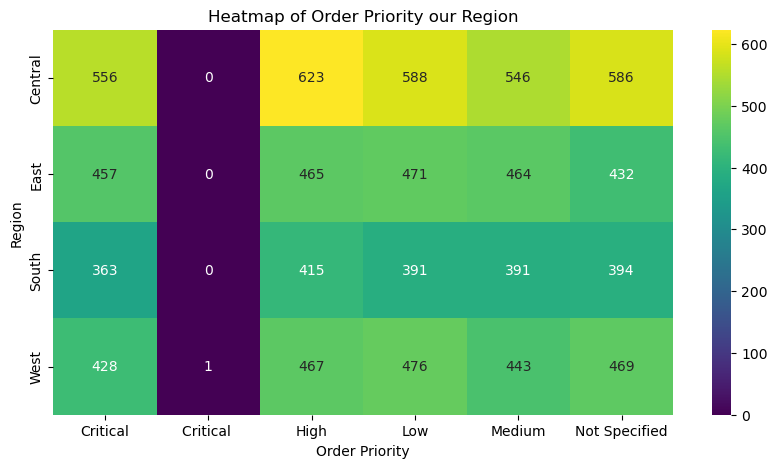

In [26]:
plt.figure(figsize=(10,5))
sns.heatmap(pivot_table,annot=True,fmt='d',cmap='viridis')
plt.title("Heatmap of Order Priority our Region")
plt.show()

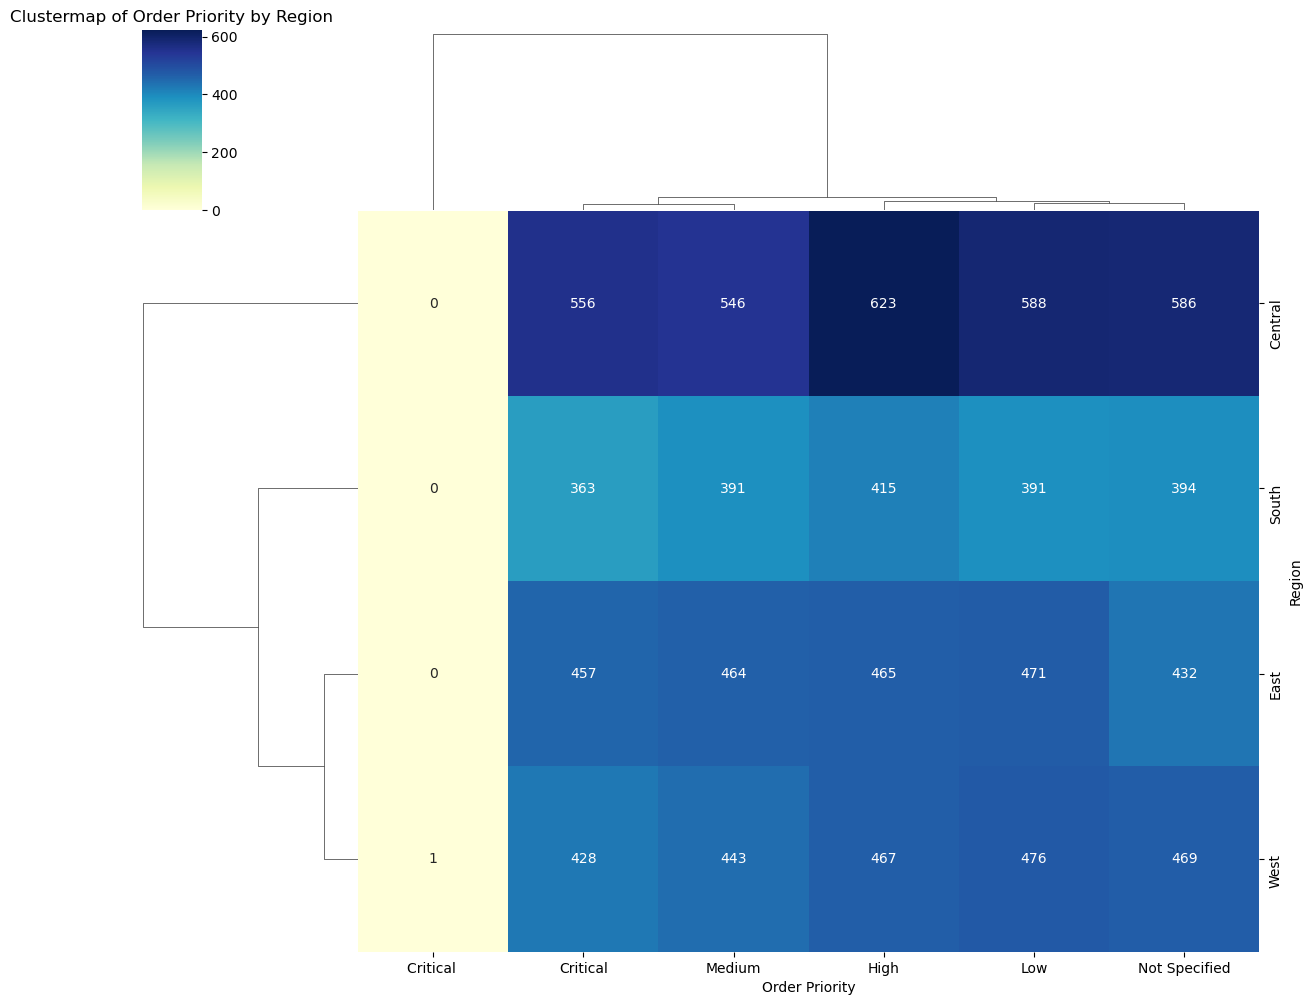

In [27]:
sns.clustermap(pivot_table, annot=True, fmt='d', cmap='YlGnBu', figsize=(12, 10))
plt.title('Clustermap of Order Priority by Region')
plt.show()

How does the Discount vary across different Product Categories?

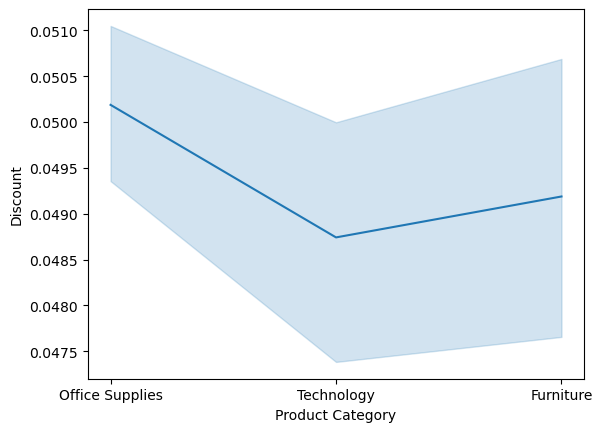

In [28]:
sns.lineplot(x=df['Product Category'],y=df['Discount']);

In [29]:
discount_summary = df.groupby('Product Category')['Discount'].describe()
print(discount_summary)

                   count      mean       std  min   25%   50%   75%   max
Product Category                                                         
Furniture         1933.0  0.049188  0.032271  0.0  0.02  0.05  0.08  0.25
Office Supplies   5181.0  0.050187  0.031498  0.0  0.02  0.05  0.08  0.10
Technology        2312.0  0.048741  0.032058  0.0  0.02  0.05  0.08  0.10


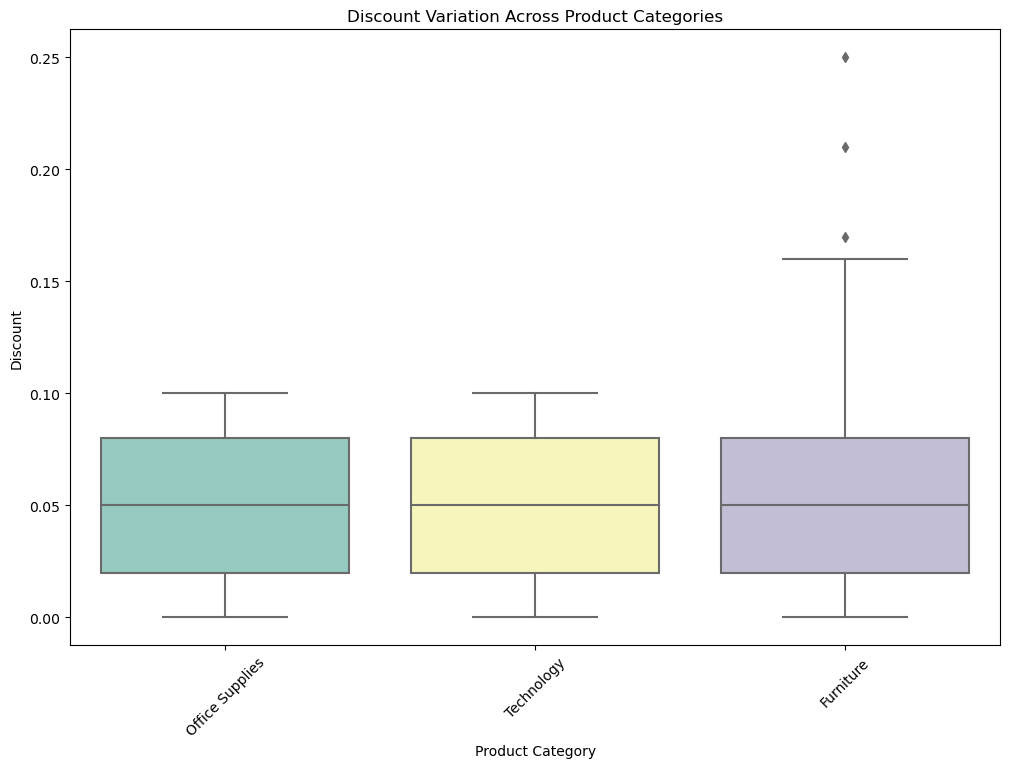

In [30]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Product Category', y='Discount', data=df, palette='Set3')
plt.title('Discount Variation Across Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Discount')
plt.xticks(rotation=45)
plt.show()

What is the distribution of Unit Price across different Product Sub-Categories?

In [31]:
df.groupby("Product Sub-Category")['Unit Price'].describe()

,count,mean,std,min,25%,50%,75%,max
Product Sub-Category,,,,,,,,
Appliances,492.0,72.381728,93.322807,2.22,11.70,42.980,70.9700,363.25
Binders and Binder Accessories,1028.0,58.500477,182.511338,1.68,4.98,8.320,24.9200,1889.99
Bookcases,206.0,172.680971,188.533321,4.98,100.98,130.980,150.9800,880.98
Chairs & Chairmats,440.0,185.228364,114.462514,1.81,100.98,150.980,276.2000,500.98
Computer Peripherals,846.0,42.478428,50.029382,0.99,15.98,30.420,43.2200,300.97
Copiers and Fax,98.0,747.438980,837.933530,199.99,449.99,524.990,599.9900,3499.99
Envelopes,272.0,27.530000,36.808603,2.66,7.64,11.580,30.9800,162.93
Labels,329.0,5.393343,9.492134,2.61,2.89,3.690,4.9100,98.31
Office Furnishings,883.0,33.789287,40.727812,1.68,8.37,17.670,41.1450,279.48


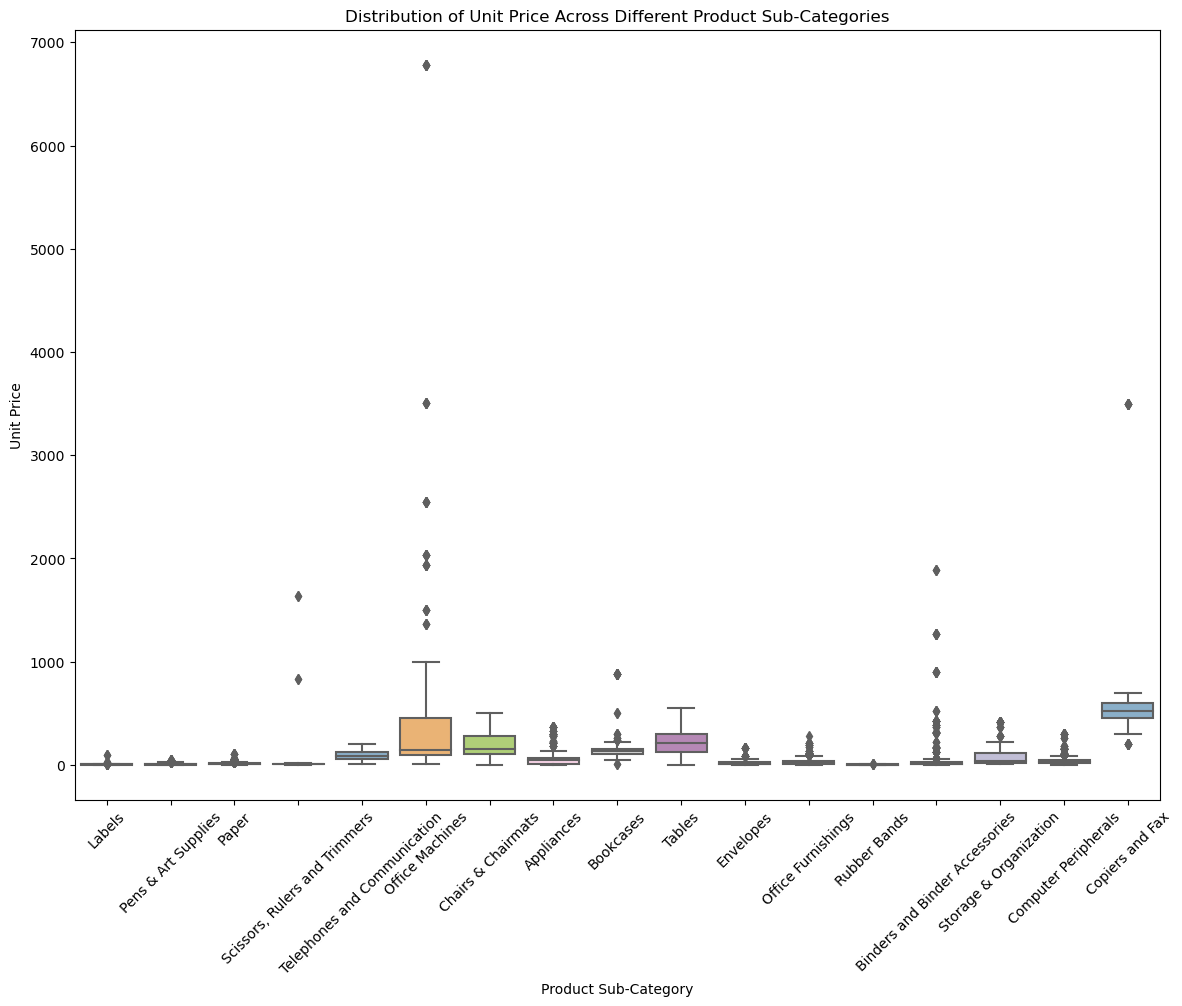

In [32]:
plt.figure(figsize=(14, 10))
sns.boxplot(x='Product Sub-Category', y='Unit Price', data=df, palette='Set3')
plt.title('Distribution of Unit Price Across Different Product Sub-Categories')
plt.xlabel('Product Sub-Category')
plt.ylabel('Unit Price')
plt.xticks(rotation=45)
plt.show()

Correlation Analysis:

<p>Is there a correlation between Unit Price and Profit?
<p>How does Discount correlate with Sales and Profit?

In [33]:
correlation_matrix = df[['Unit Price', 'Profit', 'Discount', 'Sales']].corr()
print(correlation_matrix)

            Unit Price    Profit  Discount     Sales
Unit Price    1.000000 -0.048559  0.001099  0.433984
Profit       -0.048559  1.000000 -0.039467  0.371583
Discount      0.001099 -0.039467  1.000000 -0.021286
Sales         0.433984  0.371583 -0.021286  1.000000


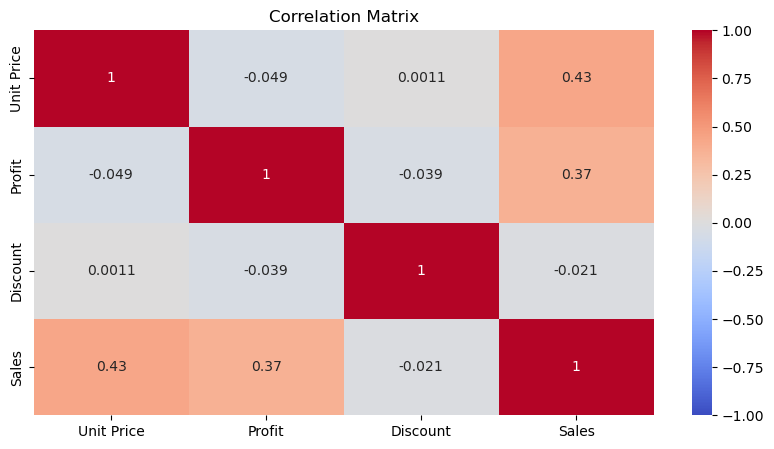

In [34]:
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

Descriptive Statistics:

1. What are the summary statistics for Shipping Cost in each Region?
2. What are the average and median Sales for each Customer Segment?

In [58]:
# Group by 'Region' and calculate summary statistics for 'Shipping Cost'
shipping_cost_summary = df.groupby('Region')['Shipping Cost'].describe()
print(shipping_cost_summary)

          count       mean        std   min    25%    50%    75%     max
Region                                                                  
Central  2878.0  12.800434  17.819097  0.49  3.300  6.035  13.99  164.73
East     2269.0  13.180502  17.576822  0.49  3.040  6.050  14.52  110.20
South    1940.0  11.820381  15.509644  0.49  3.135  6.050  12.27   99.00
West     2267.0  12.760101  17.078423  0.49  2.995  5.990  13.44  110.20


In [59]:
# Group by 'Customer Segment' and calculate mean and median for 'Sales'
sales_summary = df.groupby('Customer Segment')['Sales'].agg(['mean', 'median'])
print(sales_summary)

                        mean   median
Customer Segment                     
Consumer          964.522923  208.775
Corporate         959.744990  189.770
Home Office       928.234965  210.765
Small Business    891.582142  198.280


Time-Series Analysis (if time data is available):

How do Sales trends vary across different Regions over time?

In [38]:
## There is no time available but we try to solve it latter because we deleted the column of time

In [37]:
df.sample(2)

,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Ship Mode,Customer Segment,Product Category,Product Sub-Category,Product Container,Product Base Margin,Region,State or Province,City,Profit,Quantity ordered new,Sales
4331,High,0.04,4.24,5.41,1630,Regular Air,Home Office,Office Supplies,Binders and Binder Accessories,Small Box,0.35,Central,Texas,Houston,-87.49200,40,175.91
6463,High,0.00,17.98,8.51,2380,Regular Air,Small Business,Technology,Office Machines,Medium Box,0.4,Central,Michigan,Grand Rapids,5.49492,8,161.48


Customer Behavior Analysis:

1. Which Customer Segment has the highest average Sales?
2. What is the repeat purchase behavior of customers (using Customer ID)?

In [60]:
# Group by 'Customer Segment' and calculate the mean for 'Sales'
average_sales_by_segment = df.groupby('Customer Segment')['Sales'].mean().reset_index()

# Identify the Customer Segment with the highest average Sales
highest_avg_sales_segment = average_sales_by_segment.loc[average_sales_by_segment['Sales'].idxmax()]

print("Customer Segment with the Highest Average Sales:")
print(highest_avg_sales_segment)

Customer Segment with the Highest Average Sales:
Customer Segment      Consumer
Sales               964.522923
Name: 0, dtype: object


In [40]:
# Group by 'Customer ID' and count the number of purchases
repeat_purchase_behavior = df.groupby('Customer ID').size().reset_index(name='Purchase Count')

# Identify customers with repeat purchases
repeat_customers = repeat_purchase_behavior[repeat_purchase_behavior['Purchase Count'] > 1]

print("Repeat Purchase Behavior of Customers:")
print(repeat_customers)


Repeat Purchase Behavior of Customers:
      Customer ID  Purchase Count
1               3               6
2               5               2
3               6               4
10             14               5
11             15               6
...           ...             ...
2698         3398               3
2699         3399               4
2700         3400               7
2701         3402               4
2702         3403               2

[1806 rows x 2 columns]


Profitability Analysis:

<p> Which Product Sub-Category is the most profitable?
<p> How does Profit vary across different State or Province?

In [61]:
# Group by 'Product Sub-Category' and calculate the sum of 'Profit'
profit_by_sub_category = df.groupby('Product Sub-Category')['Profit'].sum().reset_index()

# Identify the most profitable Product Sub-Category
most_profitable_sub_category = profit_by_sub_category.loc[profit_by_sub_category['Profit'].idxmax()]

print("Most Profitable Product Sub-Category:")
print(most_profitable_sub_category)

Most Profitable Product Sub-Category:
Product Sub-Category    Telephones and Communication
Profit                                 297950.524866
Name: 16, dtype: object


In [42]:
# Group by 'State or Province' and calculate the sum of 'Profit'
profit_by_state = df.groupby('State or Province')['Profit'].sum().reset_index()

print("Profit Variation Across Different States or Provinces:")
print(profit_by_state)


Profit Variation Across Different States or Provinces:
       State or Province         Profit
0                Alabama   10771.983920
1                Arizona   43506.286360
2               Arkansas    9433.202520
3             California   86098.387760
4               Colorado   20058.021748
5            Connecticut    7557.108486
6               Delaware      63.934640
7   District of Columbia   25515.488720
8                Florida   24416.807245
9                Georgia   15573.853705
10                 Idaho   15660.122920
11              Illinois  127840.023010
12               Indiana   36401.278912
13                  Iowa   17070.291878
14                Kansas   15000.668400
15              Kentucky    8129.198488
16             Louisiana     937.355728
17                 Maine   16509.323371
18              Maryland   21043.770734
19         Massachusetts   42856.248113
20              Michigan   53041.351644
21             Minnesota   33603.852099
22           Mississippi 

Sales Performance Analysis:

1. What are the top 10 products by Sales?
2. How does Ship Mode affect Shipping Cost and Profit?

In [62]:
# Group by 'Product Sub-Category' and calculate the sum of 'Sales'
sales_by_product = df.groupby('Product Sub-Category')['Sales'].sum().reset_index()

# Identify the top 10 products by Sales
top_10_products_by_sales = sales_by_product.sort_values(by='Sales', ascending=False).head(10)

print("Top 10 Products by Sales:")
print(top_10_products_by_sales)

Top 10 Products by Sales:
              Product Sub-Category       Sales
9                  Office Machines  1218656.59
16    Telephones and Communication  1144272.98
3               Chairs & Chairmats  1080461.50
15                          Tables  1012932.12
5                  Copiers and Fax   661211.93
1   Binders and Binder Accessories   638582.09
14          Storage & Organization   563443.77
2                        Bookcases   500493.25
4             Computer Peripherals   490840.53
0                       Appliances   456723.08


In [44]:
# Group by 'Ship Mode' and calculate the mean for 'Shipping Cost' and 'Profit'
ship_mode_effect = df.groupby('Ship Mode')[['Shipping Cost', 'Profit']].mean().reset_index()

print("Effect of Ship Mode on Shipping Cost and Profit:")
print(ship_mode_effect)

Effect of Ship Mode on Shipping Cost and Profit:
        Ship Mode  Shipping Cost      Profit
0  Delivery Truck      45.197171  208.933678
1     Express Air       8.039169  136.204485
2     Regular Air       7.634974  127.004282


Regional Analysis:

1. Which Region has the highest total Sales?
2. How do Sales and Profit differ across different Cities?

In [45]:
# Group by 'Region' and calculate the sum of 'Sales'
sales_by_region = df.groupby('Region')['Sales'].sum().reset_index()

# Identify the region with the highest total Sales
highest_sales_region = sales_by_region.loc[sales_by_region['Sales'].idxmax()]

print("Region with the Highest Total Sales:")
print(highest_sales_region)

Region with the Highest Total Sales:
Region       Central
Sales     2540341.62
Name: 0, dtype: object


In [46]:
# Group by 'City' and calculate the sum of 'Sales' and 'Profit'
sales_profit_by_city = df.groupby('City')[['Sales', 'Profit']].sum().reset_index()

print("Sales and Profit Across Different Cities:")
print(sales_profit_by_city)

Sales and Profit Across Different Cities:
            City     Sales        Profit
0       Aberdeen   5296.39   2411.897720
1        Abilene   3950.34   1436.550440
2       Abington     81.87    -34.088000
3          Acton     25.00     14.405800
4        Addison    496.62     25.471260
...          ...       ...           ...
1419        York    980.76    206.072800
1420  Youngstown    903.24    -25.266000
1421   Yuba City    476.43   -103.790000
1422     Yucaipa  11027.78  -3158.736892
1423        Yuma  19781.52  11820.745900

[1424 rows x 3 columns]


Discount and Sales Analysis:

1. What is the impact of Discount on Quantity ordered new?
2. How does the Discount rate affect Profit margins?


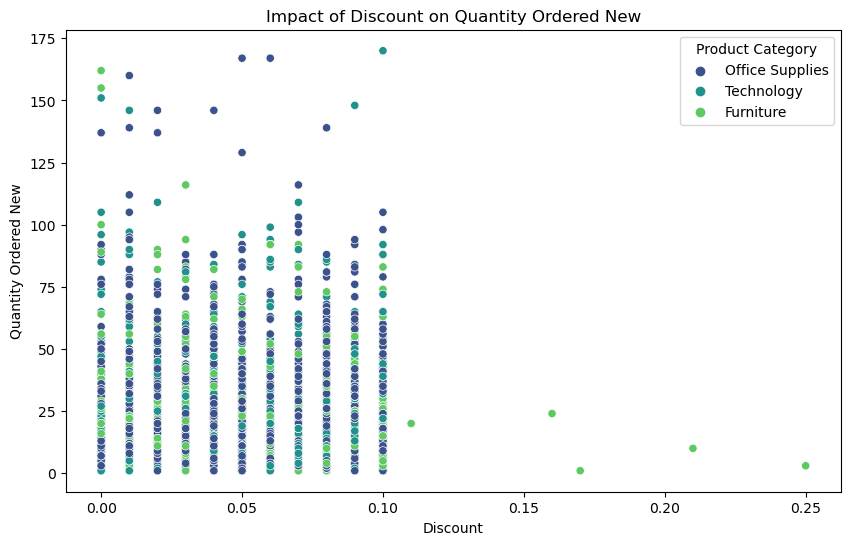

In [47]:
# Create a scatter plot to visualize the relationship between Discount and Quantity ordered new
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Discount', y='Quantity ordered new', data=df, hue='Product Category', palette='viridis')
plt.title('Impact of Discount on Quantity Ordered New')
plt.xlabel('Discount')
plt.ylabel('Quantity Ordered New')
plt.show()

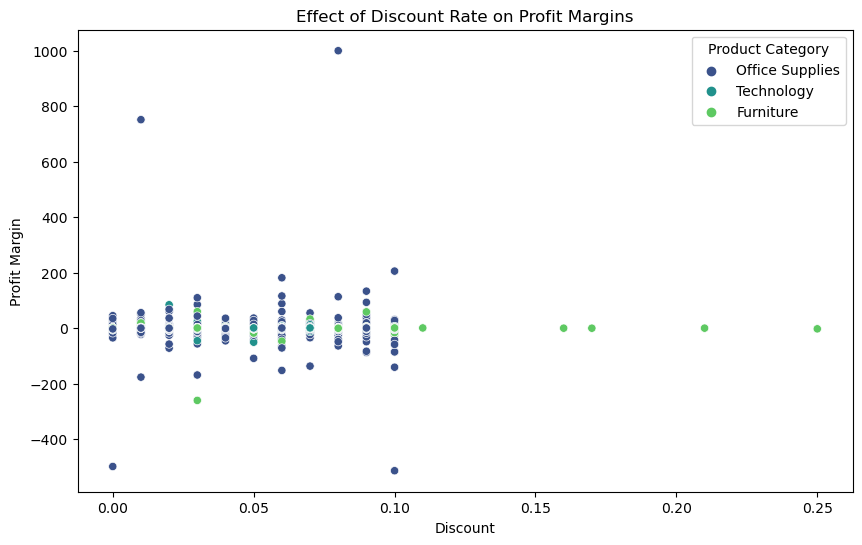

In [48]:
# Create a new column for Profit Margin
df['Profit Margin'] = df['Profit'] / df['Sales']

# Create a scatter plot to visualize the relationship between Discount and Profit Margin
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Discount', y='Profit Margin', data=df, hue='Product Category', palette='viridis')
plt.title('Effect of Discount Rate on Profit Margins')
plt.xlabel('Discount')
plt.ylabel('Profit Margin')
plt.show()

Average Quantity Ordered and Profit Margin for Different Discount Ranges:
  Discount  Quantity ordered new  Profit Margin
0    0-10%             13.727517      -0.144310
1   10-20%             15.000000      -0.006080
2   20-30%              6.500000      -1.386301
3   30-40%                   NaN            NaN
4   40-50%                   NaN            NaN
5  50-100%                   NaN            NaN


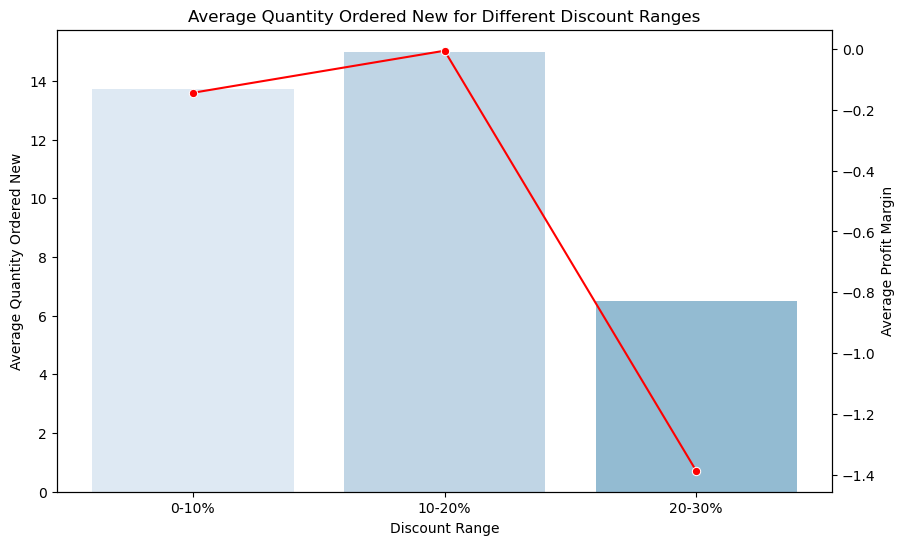

In [49]:
# Define discount ranges
discount_bins = pd.cut(df['Discount'], bins=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0], labels=['0-10%', '10-20%', '20-30%', '30-40%', '40-50%', '50-100%'])

# Group by discount ranges and calculate the mean of Quantity ordered new and Profit Margin
discount_analysis = df.groupby(discount_bins)[['Quantity ordered new', 'Profit Margin']].mean().reset_index()

print("Average Quantity Ordered and Profit Margin for Different Discount Ranges:")
print(discount_analysis)

# Plot the results
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot for Quantity Ordered New
sns.barplot(x='Discount', y='Quantity ordered new', data=discount_analysis, palette='Blues', ax=ax1)
ax1.set_title('Average Quantity Ordered New for Different Discount Ranges')
ax1.set_xlabel('Discount Range')
ax1.set_ylabel('Average Quantity Ordered New')

# Plot for Profit Margin
ax2 = ax1.twinx()
sns.lineplot(x='Discount', y='Profit Margin', data=discount_analysis, color='red', marker='o', ax=ax2)
ax2.set_ylabel('Average Profit Margin')

plt.show()

Product Analysis:

1. What are the most common Product Containers used, and how do they relate to Sales?
2. How does Product Base Margin vary across different Product Categories?

Most Common Product Containers:
  Product Container  Count
0         Small Box   4887
1          Wrap Bag   1312
2        Small Pack   1067
3        Jumbo Drum    703
4         Jumbo Box    590
5         Large Box    457
6        Medium Box    410
Sales by Product Container:
  Product Container       Sales
0         Jumbo Box  1591841.58
1        Jumbo Drum  2115605.45
2         Large Box  1187510.58
3        Medium Box   435550.14
4         Small Box  3115624.77
5        Small Pack   323173.08
6          Wrap Bag   182625.72


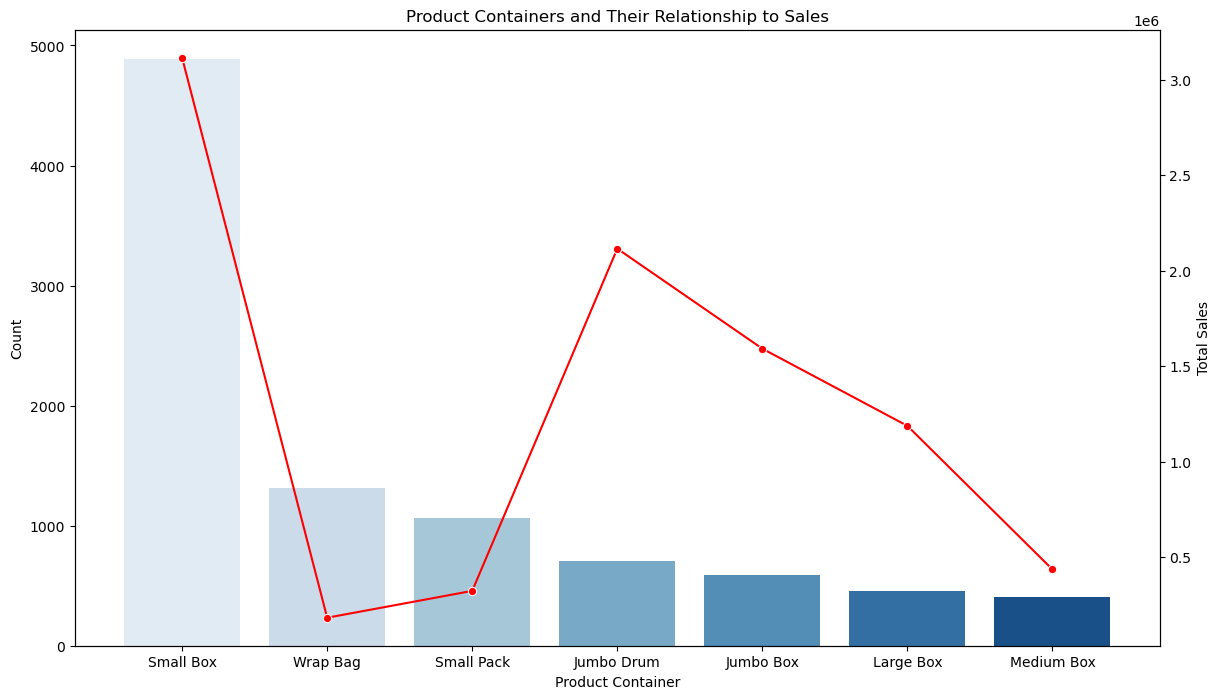

In [50]:
# Identify the most common Product Containers
container_counts = df['Product Container'].value_counts().reset_index()
container_counts.columns = ['Product Container', 'Count']

print("Most Common Product Containers:")
print(container_counts)

# Analyze the relationship between Product Container and Sales
sales_by_container = df.groupby('Product Container')['Sales'].sum().reset_index()

print("Sales by Product Container:")
print(sales_by_container)

# Merge counts and sales data for better visualization
container_analysis = pd.merge(container_counts, sales_by_container, on='Product Container')

# Plot the most common Product Containers and their relationship to Sales
fig, ax1 = plt.subplots(figsize=(14, 8))

# Bar plot for container counts
sns.barplot(x='Product Container', y='Count', data=container_analysis, palette='Blues', ax=ax1)
ax1.set_title('Product Containers and Their Relationship to Sales')
ax1.set_xlabel('Product Container')
ax1.set_ylabel('Count')

# Line plot for Sales
ax2 = ax1.twinx()
sns.lineplot(x='Product Container', y='Sales', data=container_analysis, color='red', marker='o', ax=ax2)
ax2.set_ylabel('Total Sales')

plt.show()

Order Priority           object
Discount                float64
Unit Price              float64
Shipping Cost           float64
Customer ID               int64
Ship Mode                object
Customer Segment         object
Product Category         object
Product Sub-Category     object
Product Container        object
Product Base Margin      object
Region                   object
State or Province        object
City                     object
Profit                  float64
Quantity ordered new      int64
Sales                   float64
Profit Margin           float64
dtype: object
[0.36 0.54 0.37 0.56 0.59 0.38 0.6 0.52 0.55 0.77 0.78 0.45 0.57 0.43 0.4
 0.42 0.39 0.58 0.49 0.71 0.8 0.76 0.5 0.68 0.46 0.35 0.47 0.83 0.74 0.81
 0.51 0.75 <function mean at 0x00000236A6AE39D0> 0.67 0.69 0.66 0.63 0.65
 0.44 0.85 0.7 0.62 0.79 0.64 0.53 0.61 0.41 0.48 0.72 0.82 0.84 0.73]
Product Base Margin by Product Category:
  Product Category  Product Base Margin
0        Furniture             0.598

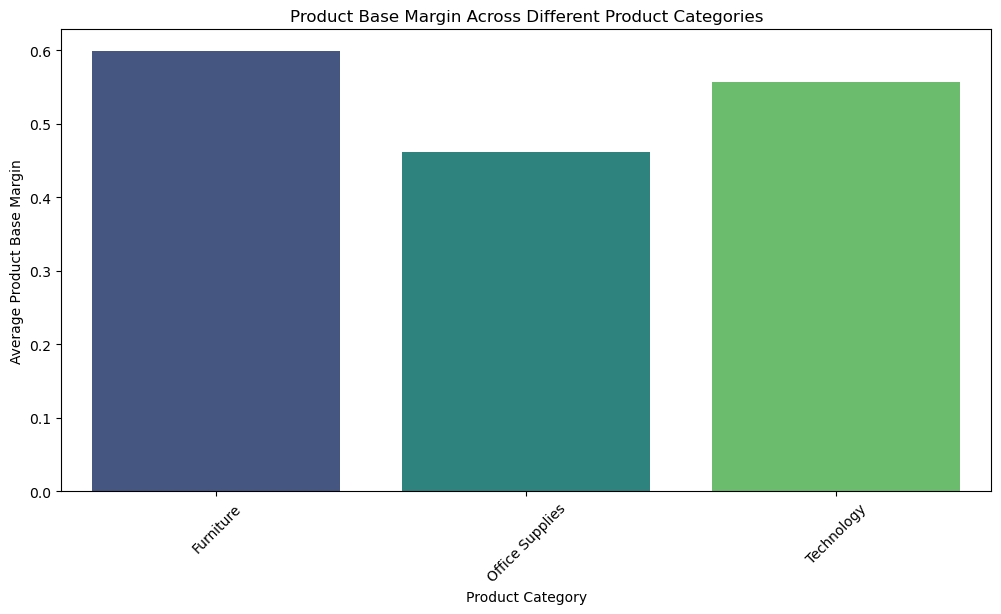

In [53]:
# Check the data types of the columns
print(df.dtypes)

# Check for non-numeric values in the 'Product Base Margin' column
print(df['Product Base Margin'].unique())

# Convert 'Product Base Margin' to numeric, coercing errors to NaN
df['Product Base Margin'] = pd.to_numeric(df['Product Base Margin'], errors='coerce')

# Drop rows with NaN values in 'Product Base Margin'
df = df.dropna(subset=['Product Base Margin'])

# Calculate average Product Base Margin for each Product Category
base_margin_by_category = df.groupby('Product Category')['Product Base Margin'].mean().reset_index()

print("Product Base Margin by Product Category:")
print(base_margin_by_category)

# Plot the Product Base Margin for each Product Category
plt.figure(figsize=(12, 6))
sns.barplot(x='Product Category', y='Product Base Margin', data=base_margin_by_category, palette='viridis')
plt.title('Product Base Margin Across Different Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Average Product Base Margin')
plt.xticks(rotation=45)
plt.show()

Shipping and Logistics Analysis:

1. Which Ship Mode is most frequently used, and what is its impact on Profit?
2. How does Shipping Cost influence Order Priority?

Most Frequently Used Ship Modes:
        Ship Mode  Count
0     Regular Air   6992
1  Delivery Truck   1266
2     Express Air   1096

Average Profit by Ship Mode:
        Ship Mode      Profit
0  Delivery Truck  204.244753
1     Express Air  132.597466
2     Regular Air  125.370447


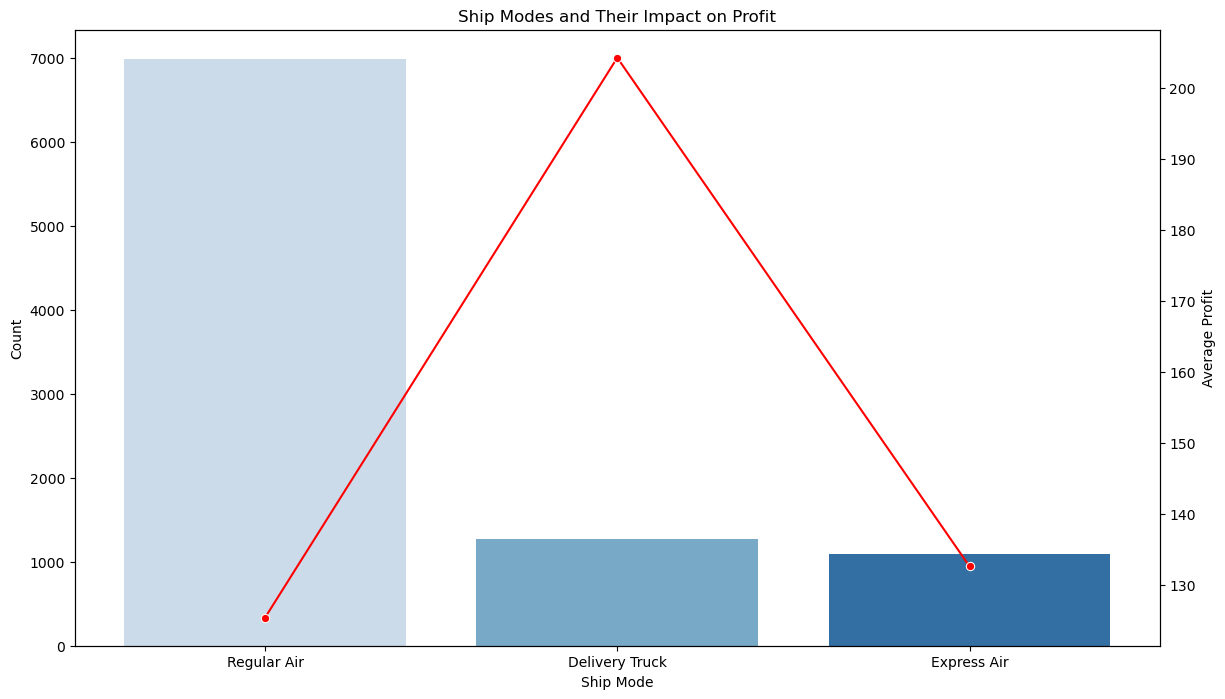

In [54]:
# Identify the most frequently used Ship Mode
ship_mode_counts = df['Ship Mode'].value_counts().reset_index()
ship_mode_counts.columns = ['Ship Mode', 'Count']

print("Most Frequently Used Ship Modes:")
print(ship_mode_counts)

# Analyze the relationship between Ship Mode and Profit
profit_by_ship_mode = df.groupby('Ship Mode')['Profit'].mean().reset_index()

print("\nAverage Profit by Ship Mode:")
print(profit_by_ship_mode)

# Merge counts and profit data for better visualization
ship_mode_analysis = pd.merge(ship_mode_counts, profit_by_ship_mode, on='Ship Mode')

# Plot the most frequently used Ship Modes and their impact on Profit
fig, ax1 = plt.subplots(figsize=(14, 8))

# Bar plot for ship mode counts
sns.barplot(x='Ship Mode', y='Count', data=ship_mode_analysis, palette='Blues', ax=ax1)
ax1.set_title('Ship Modes and Their Impact on Profit')
ax1.set_xlabel('Ship Mode')
ax1.set_ylabel('Count')

# Line plot for Profit
ax2 = ax1.twinx()
sns.lineplot(x='Ship Mode', y='Profit', data=ship_mode_analysis, color='red', marker='o', ax=ax2)
ax2.set_ylabel('Average Profit')

plt.show()

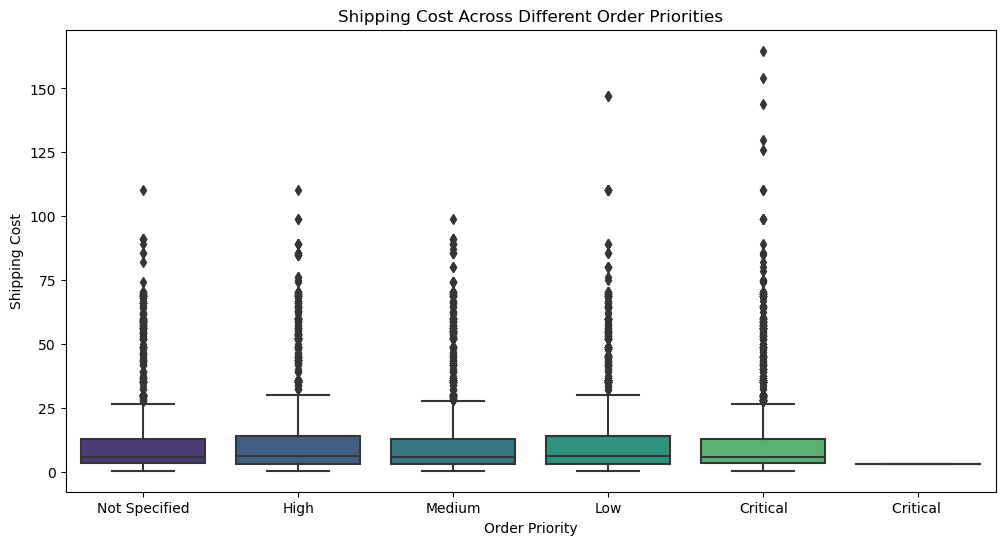

In [55]:
# Analyze the relationship between Shipping Cost and Order Priority
plt.figure(figsize=(12, 6))
sns.boxplot(x='Order Priority', y='Shipping Cost', data=df, palette='viridis')
plt.title('Shipping Cost Across Different Order Priorities')
plt.xlabel('Order Priority')
plt.ylabel('Shipping Cost')
plt.show()

Segment Analysis:

1. What are the top-performing Customer Segments by Profit?
2. How do Sales and Profit compare across different Product Sub-Categories within each Customer Segment?

Top-Performing Customer Segments by Profit:
  Customer Segment         Profit
1        Corporate  503420.896285
3   Small Business  300128.147362
2      Home Office  274723.080014
0         Consumer  202218.720388


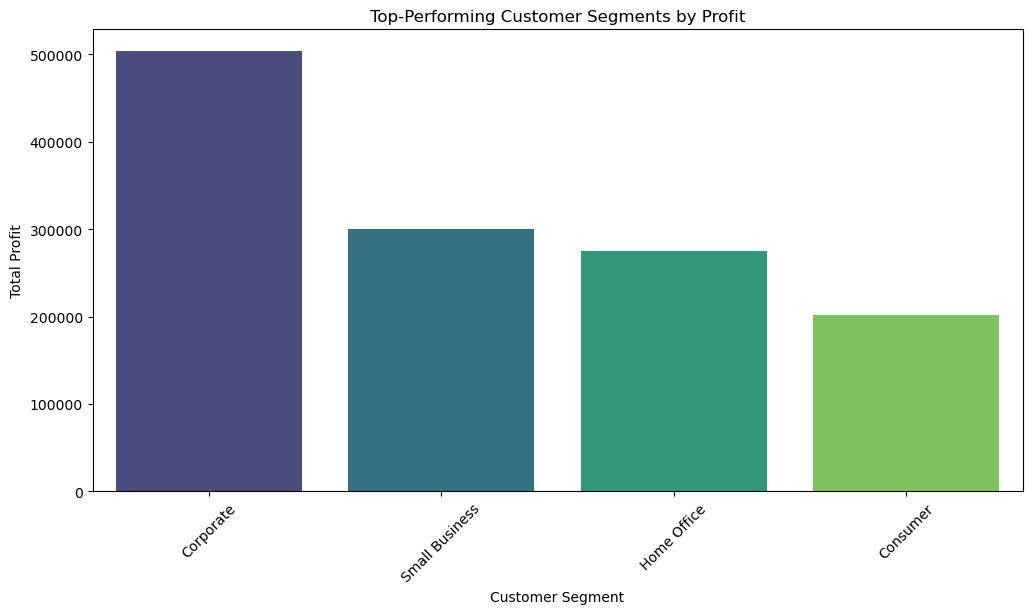

In [56]:
# Calculate total profit for each Customer Segment
profit_by_segment = df.groupby('Customer Segment')['Profit'].sum().reset_index()

# Sort the segments by total profit in descending order
top_segments_by_profit = profit_by_segment.sort_values(by='Profit', ascending=False)

print("Top-Performing Customer Segments by Profit:")
print(top_segments_by_profit)

# Plot the top-performing Customer Segments by Profit
plt.figure(figsize=(12, 6))
sns.barplot(x='Customer Segment', y='Profit', data=top_segments_by_profit, palette='viridis')
plt.title('Top-Performing Customer Segments by Profit')
plt.xlabel('Customer Segment')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


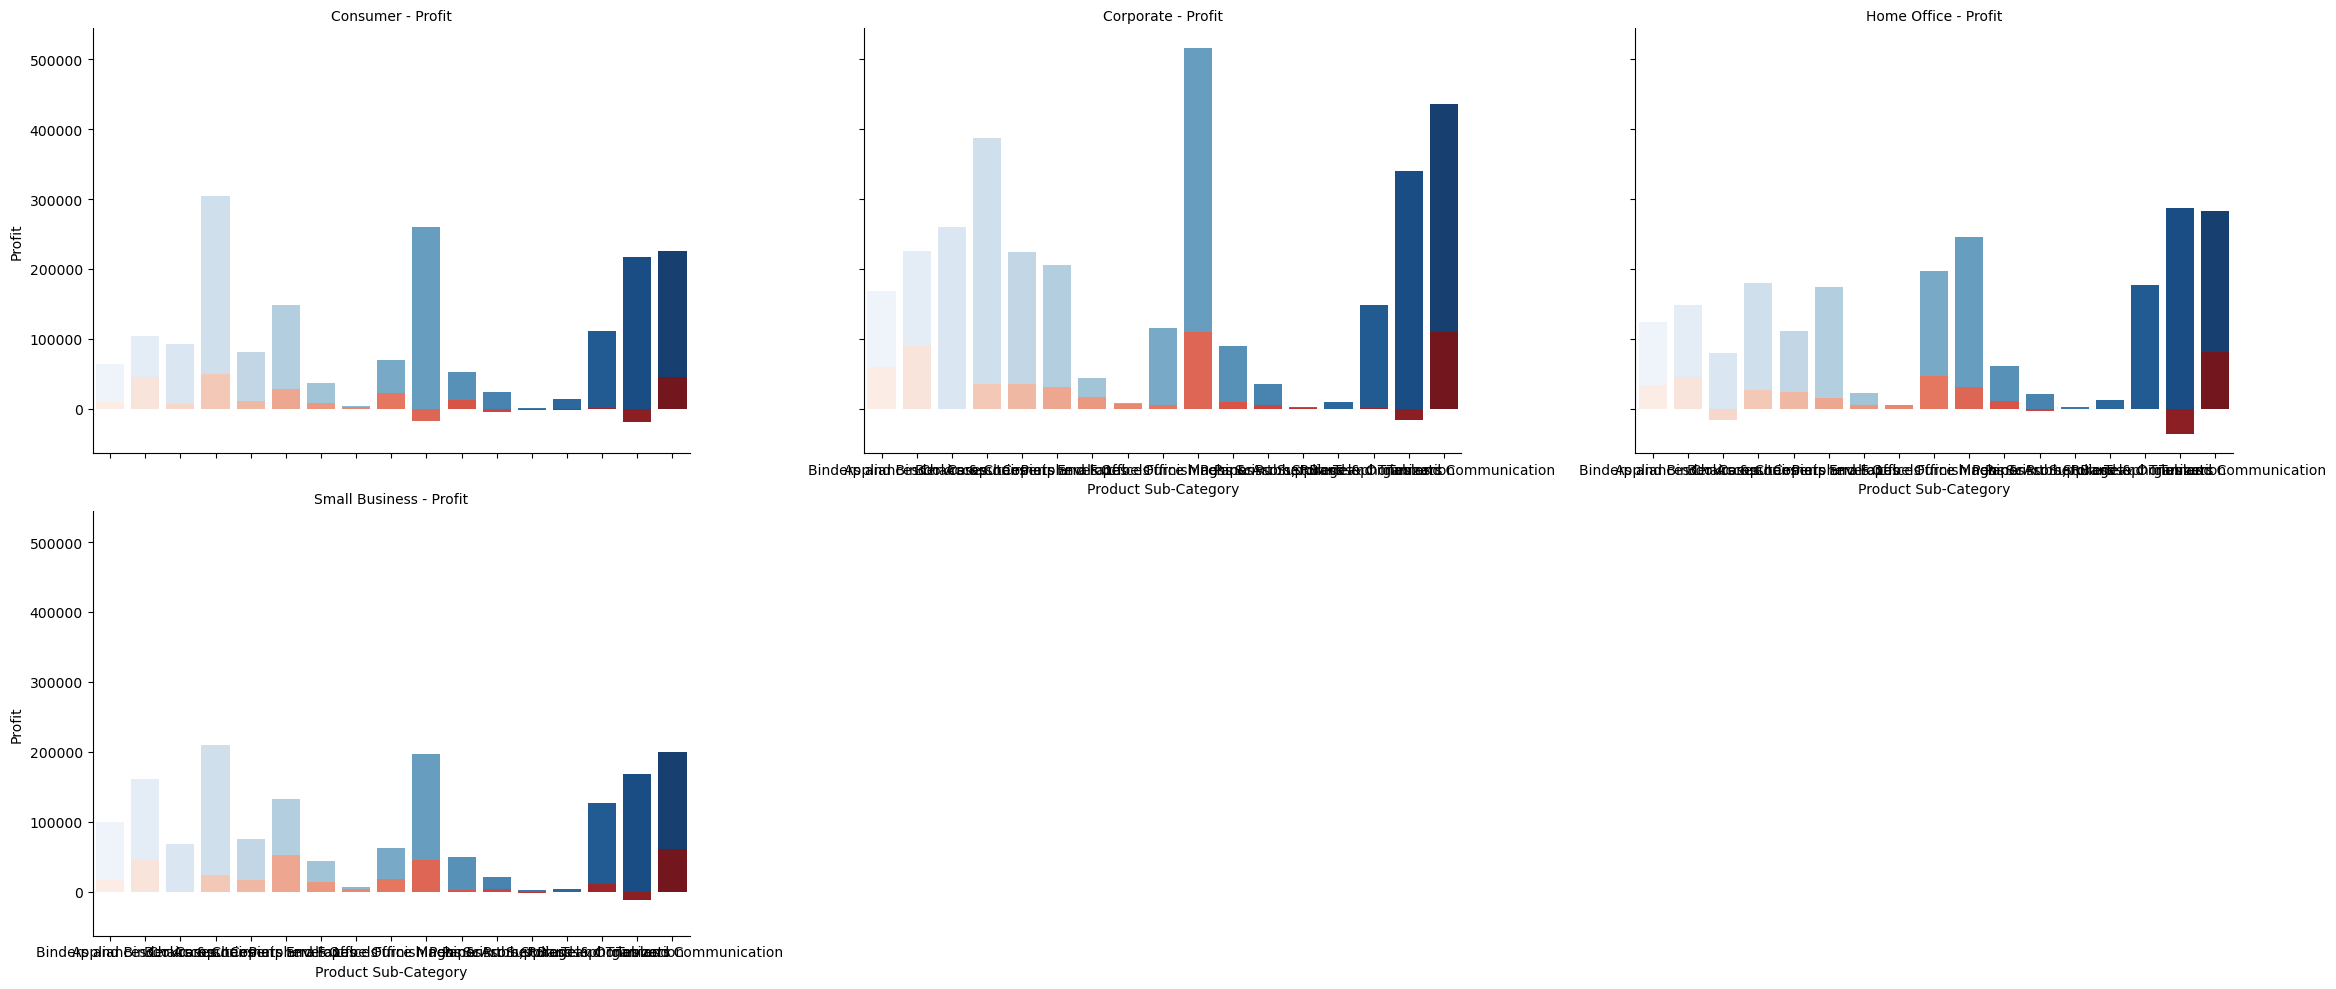

In [57]:
# Calculate total Sales and Profit for each combination of Customer Segment and Product Sub-Category
segment_subcategory_summary = df.groupby(['Customer Segment', 'Product Sub-Category'])[['Sales', 'Profit']].sum().reset_index()

# Plot Sales and Profit comparison across Product Sub-Categories for each Customer Segment
g = sns.FacetGrid(segment_subcategory_summary, col='Customer Segment', col_wrap=3, height=5, aspect=1.5)

# Plot Sales
g.map(sns.barplot, 'Product Sub-Category', 'Sales', palette='Blues')
g.set_axis_labels('Product Sub-Category', 'Sales')
g.set_titles('{col_name} - Sales')
g.add_legend()

# Plot Profit
g.map(sns.barplot, 'Product Sub-Category', 'Profit', palette='Reds')
g.set_axis_labels('Product Sub-Category', 'Profit')
g.set_titles('{col_name} - Profit')
g.add_legend()

plt.show()
